In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [15]:
data.head(10)

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,3500,5187
7,Avenida Cásper Líbero,Centro,26,1,0,Studio e kitnet,1727,2244
8,Rua José Peres Campelo,Piqueri,32,2,0,Apartamento,1200,1592
9,Rua Guaperuvu,Vila Aricanduva,36,1,0,Apartamento,1200,1501


In [25]:
##### os 5 bairros que mais procurados (aparecem)
bairros_mais_procurados = data['district'].value_counts()
top5_bairros = bairros_mais_procurados.head(5)
top5_bairros 

district
Bela Vista         352
Vila Mariana       232
Jardim Paulista    220
Centro             178
Pinheiros          159
Name: count, dtype: int64

C:\Users\maria\AppData\Local\Temp\ipykernel_23304\3230986788.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_bairros.values, y=top5_bairros.index, palette="Blues_r")


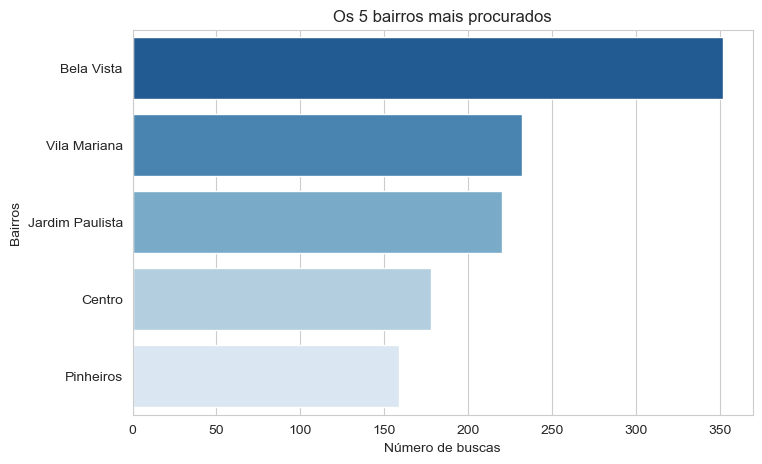

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

sns.barplot(x=top5_bairros.values, y=top5_bairros.index, palette="Blues_r")

plt.xlabel("Número de buscas")
plt.ylabel("Bairros")
plt.title("Os 5 bairros mais procurados")

plt.show()

In [18]:
# Qual a ordem de preferência 
contagem_tipos = data['type'].value_counts()
contagem_tipos

type
Apartamento           7194
Casa                  2841
Studio e kitnet       1381
Casa em condomínio     241
Name: count, dtype: int64

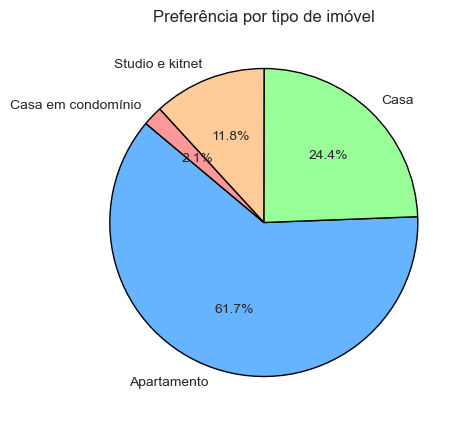

In [36]:
plt.figure(figsize=(5, 5))
plt.pie(
    contagem_tipos.values,
    labels=contagem_tipos.index,
    autopct='%1.1f%%',  
    startangle=140, 
    colors=["#66b3ff", "#99ff99", "#ffcc99", "#ff9999", "#c2c2f0"], 
    wedgeprops={'edgecolor': 'black'} 
)
plt.title("Preferência por tipo de imóvel")
plt.show()

In [39]:
media_aluguel_bairro = data.groupby('district')['rent'].mean().round(2)
# Os 10 bairros mais caros (somente aluguel)
top10_rent = media_aluguel_bairro.sort_values(ascending=False).head(10)
top10_rent

district
Jardim Tango                         15000.00
Alphaville Residencial Dois          15000.00
Alphaville Residencial Plus          15000.00
Residencial Cinco (alphaville)       13600.00
Alphaville Residencial Um            13500.00
Cidade Jardim                        13000.00
Pacaembu                             12054.00
Chácara Meyer                        12000.00
Centro Empresarial Tamboré           11833.33
Jardim Vitoria Regia (zona Oeste)    11820.00
Name: rent, dtype: float64

In [41]:
# custo com taxas
media_aluguel_bairro_tot = data.groupby('district')['total'].mean().round(2)
# Os 10 bairros mais caros (aluguel + taxas)
top10_total = media_aluguel_bairro_tot.sort_values(ascending=False).head(10)
top10_total

district
Cidade Jardim                        20380.0
Alphaville Residencial Plus          20270.0
Alphaville Residencial Dois          17410.0
Jardim Cordeiro                      16670.0
Jardim Vitoria Regia (zona Oeste)    16480.0
Jardim Tango                         15640.0
Residencial Cinco (alphaville)       15380.0
Alphaville Residencial Um            15030.0
Centro Empresarial Tamboré           14430.0
Pacaembu                             14074.0
Name: total, dtype: float64

C:\Users\maria\AppData\Local\Temp\ipykernel_23304\2246289595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\maria\AppData\Local\Temp\ipykernel_23304\2246289595.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


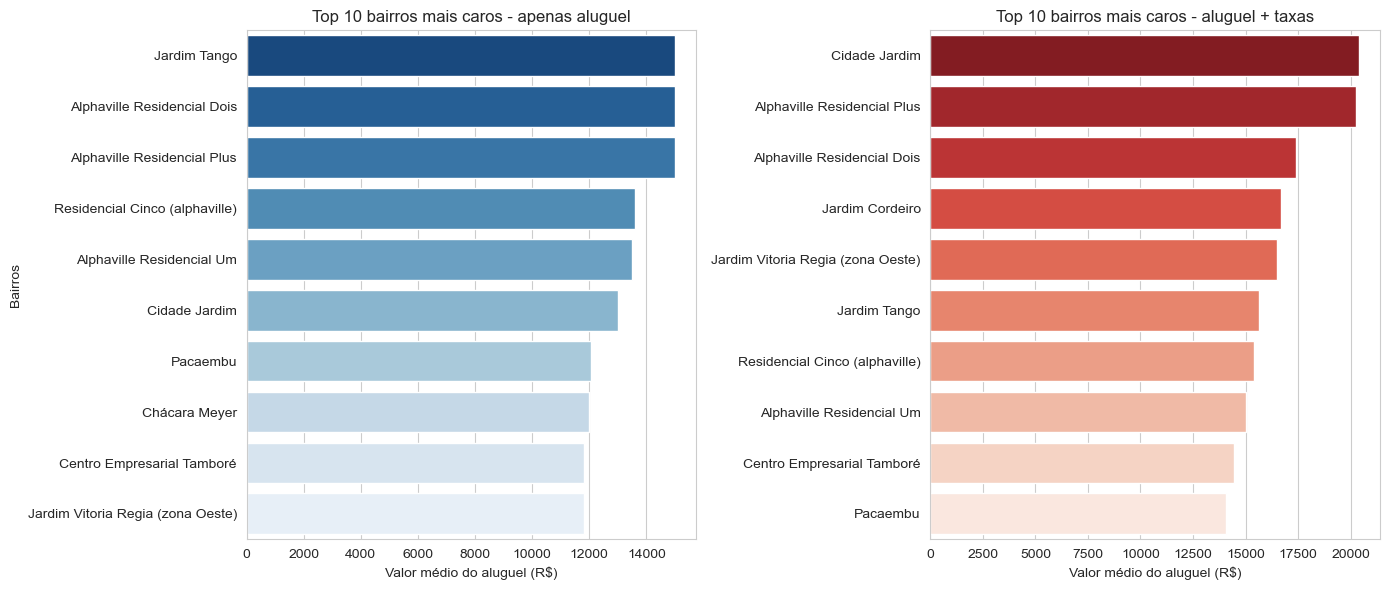

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# gráfico 1: apenas aluguel
sns.barplot(
    x = top10_rent.values,
    y =top10_rent.index,
    palette = "Blues_r",
    ax = axes[0]
)
axes[0].set_title("Top 10 bairros mais caros - apenas aluguel")
axes[0].set_xlabel("Valor médio do aluguel (R$)")
axes[0].set_ylabel("Bairros")

# gráfico 2: aluguel + taxas
sns.barplot(
    x = top10_total.values,
    y =top10_total.index,
    palette = "Reds_r",
    ax = axes[1]
)
axes[1].set_title("Top 10 bairros mais caros - aluguel + taxas")
axes[1].set_xlabel("Valor médio do aluguel (R$)")
axes[1].set_ylabel("")

plt.tight_layout()

plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_23304\3533521631.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=custo_beneficio.index, y=custo_beneficio.values, palette="coolwarm")


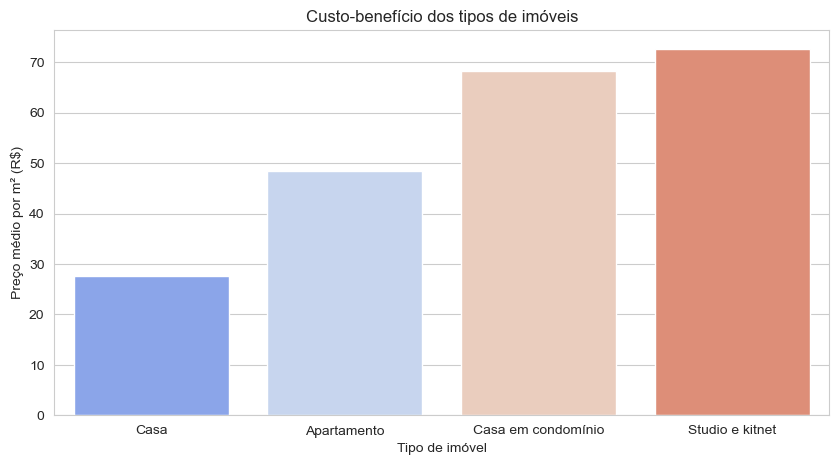

In [60]:
# que tipo de imóvel tem melhor custo benefício?

# Remover valores nulos e imóveis com tamanho 0 para evitar divisão por zero
data = data.dropna(subset=['area', 'rent'])
data = data[data['area'] > 0]

# Criar a coluna de custo-benefício (preço por m²)
data['price_per_sqm'] = data['rent'] / data['area']

# Calcular a média do preço por m² para cada tipo de imóvel
custo_beneficio = data.groupby('type')['price_per_sqm'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=custo_beneficio.index, y=custo_beneficio.values, palette="coolwarm")

plt.xlabel("Tipo de imóvel")
plt.ylabel("Preço médio por m² (R$)")
plt.title("Custo-benefício dos tipos de imóveis")

plt.show()

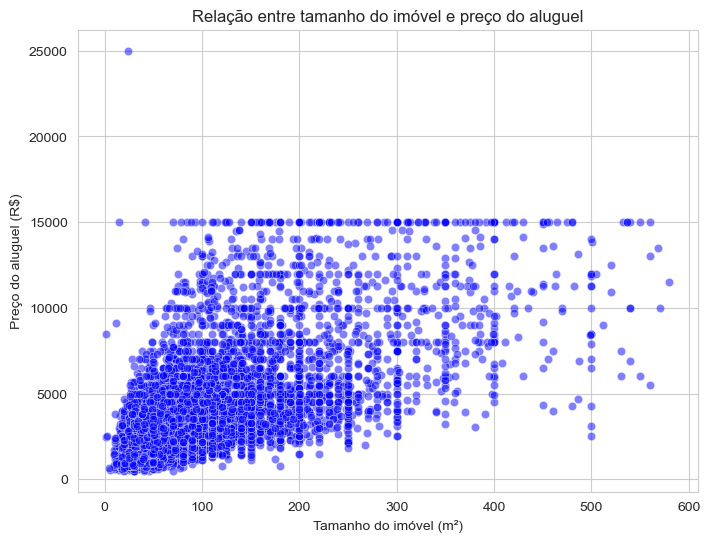

In [64]:
# o tamanho do imóvel influencia o preço?
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['area'], y=data['rent'], alpha=0.5, color="blue")

plt.xlabel("Tamanho do imóvel (m²)")
plt.ylabel("Preço do aluguel (R$)")
plt.title("Relação entre tamanho do imóvel e preço do aluguel")

plt.show()